This Notebook created to complete the "Write a Data Science Blog Post" project for Udactiy Data scientist Nanodegree

# Airbnb: An Overview

Airbnb is an online marketplace that connects people who want to rent out their homes with people who are looking for accommodations in that locale. It currently covers more than 100,000 cities and 220 countries worldwide. The company’s name comes from “air mattress B&B.”

### working in this datasets from Airbnb homes of Seattle, we will explore throughout this notebook the calendar and listings data homes of Seattle

During this analysis, our first step is:

    -- Understanding the data
    
Afterwards, we are trying to look at following sunjects in a high-level approch:

    -- Analyzing Hosts and their profiles
    -- Pricing Analysis
    -- Customer experience analysis

In [1]:
#import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
pd.set_option('display.max_columns', 999)
import locale
plt.rcParams.update({'font.size': 18})

# Reading data

In [2]:
df_listings = pd.read_csv('listings.csv')
df_calendar = pd.read_csv('calendar.csv')
df_reviews = pd.read_csv('reviews.csv')

# Summary of listings

In [3]:
df_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [4]:
df_listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


# Question 1: Analyzing hosts and their profiles

## Hosts' structure

In [5]:
nb_unique_hosts = df_listings['host_id'].nunique()
nb_listings = df_listings.shape[0]
nb_superhosts = df_listings[df_listings['host_is_superhost'] == 't']['host_id'].nunique()
print("With ", nb_unique_hosts, " of unique hosts, we have in total: ", nb_listings," Listings")
print('This includes ', nb_superhosts, ' Super hosts, which is ',100* round(nb_superhosts/nb_unique_hosts,3), ' % of all hosts')

With  2751  of unique hosts, we have in total:  3818  Listings
This includes  537  Super hosts, which is  19.5  % of all hosts


# Analyzing hosts by response Times

In [6]:
response_times = (df_listings['host_response_time'].value_counts())/df_listings.shape[0]

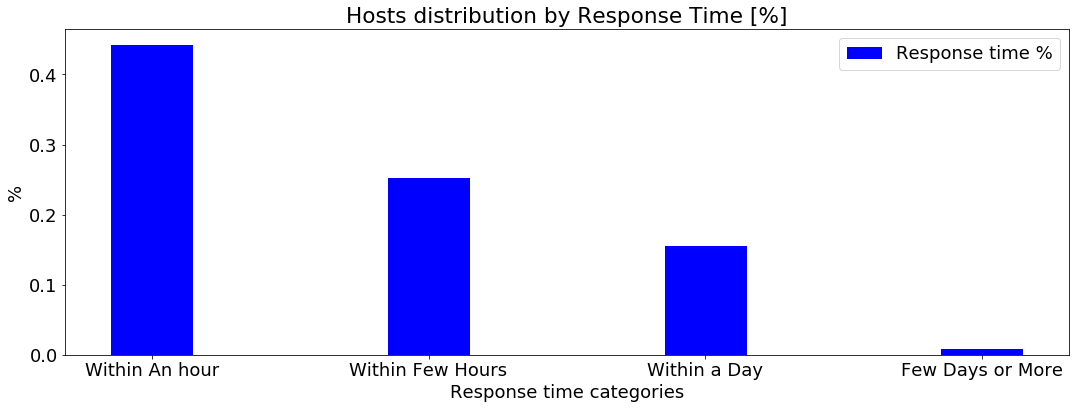

In [7]:
plt.figure(figsize=(18,6))
plt.title('Hosts distribution by Response Time [%]')
r1 = np.arange(len(response_times))

plt.bar(r1, response_times, width=0.3, color='blue', edgecolor='white', label='Response time %')

plt.xlabel('Response time categories')
plt.ylabel('%')
plt.xticks([r  for r in range(len(response_times))],['Within An hour', 'Within Few Hours', 'Within a Day','Few Days or More'])

plt.legend()
plt.show()

# Analyzing hosts by response Rate

In [8]:
response_rate = df_listings['host_response_rate'].astype(str)

for i in range(len(response_rate)):
  response_rate[i] = float(response_rate[i].strip('%'))

response_rate = response_rate.dropna()

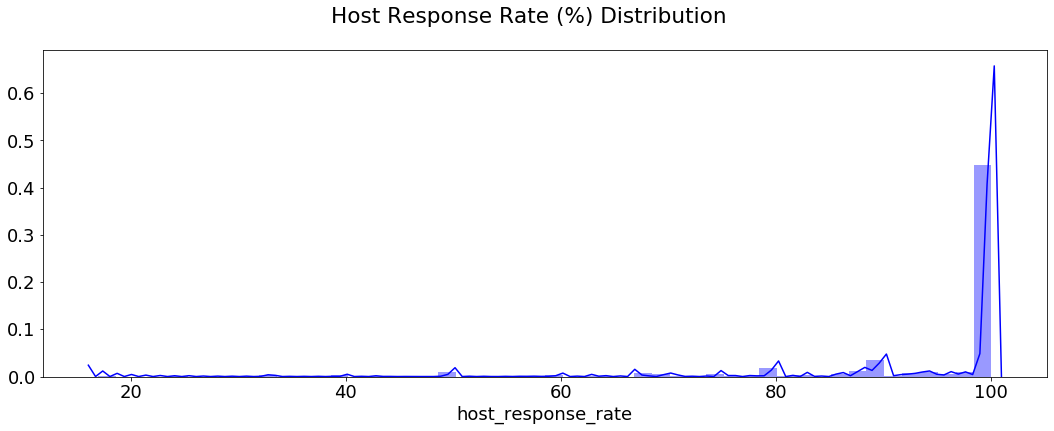

In [9]:
fig,axis = plt.subplots(1, figsize=(18,6))
plt.suptitle('Host Response Rate (%) Distribution')
plt.sca(axis)
sns.distplot(response_rate, color='blue', ax=axis)
plt.show()

# Analyzing Verification Methods

In [10]:
# Counting number of occurances
possible_values = ["email", "phone","facebook","google","jumio","kba","reviews","manual_online",
                 "manual_offline","linkedin","amex","weibo","photographer","None","sent_id" ]
verification_methods_counts = []
for val in possible_values:
  x_count = 0
    #loop through rows
  for idx in range(df_listings.shape[0]):
        #if the ed type is in the row add 1
      if val in df_listings['host_verifications'][idx]:
          x_count += 1
  verification_methods_counts.append((x_count/nb_listings)*100)

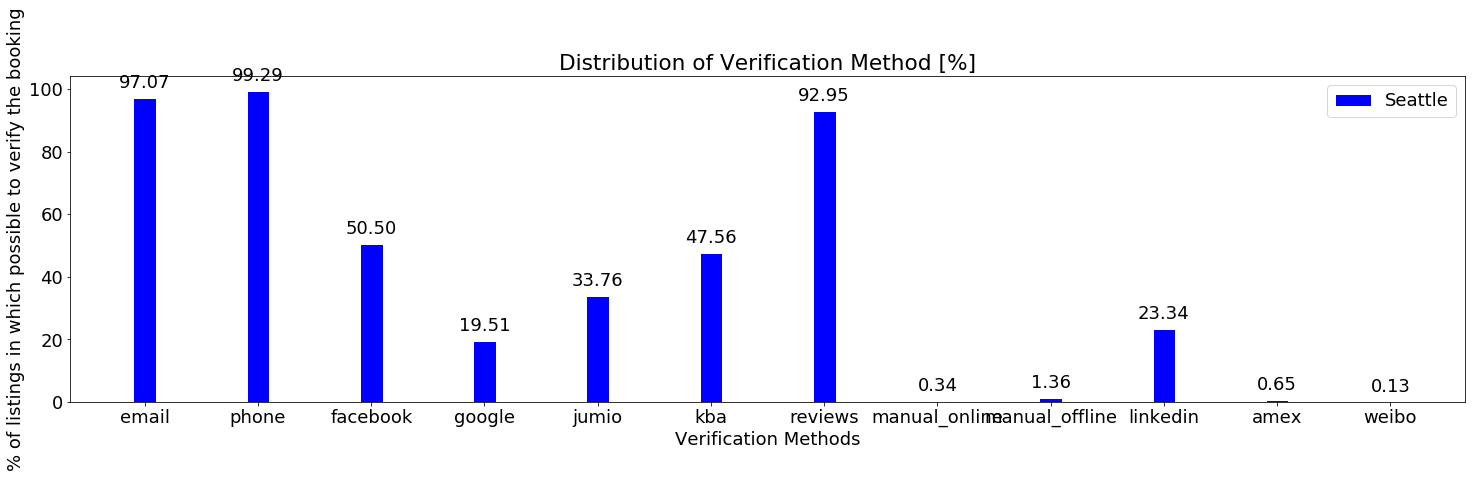

In [11]:
r1_vm = np.arange(len(verification_methods_counts[0:-3]))
r2_vm = [x for x in r1_vm]

plt.figure(figsize=(25,6))
plt.title('Distribution of Verification Method [%]')
plt.bar(r2_vm, verification_methods_counts[0:-3], width=0.2, color='blue', edgecolor='white', label='Seattle')

plt.xlabel('Verification Methods')
plt.ylabel('% of listings in which possible to verify the booking')
plt.xticks([r  for r in range(len(verification_methods_counts[0:-3]))],possible_values[0:-3])
plt.legend()

for x,y in zip(r1_vm, verification_methods_counts[0:-3]):

    label = "{:.2f}".format(y)

    plt.annotate(label, 
                 (x,y), 
                 textcoords="offset points",
                 xytext=(0,10), 
                 ha='center') 
plt.show()

# Question 2 - Analyzing Offered Prices

In [12]:
# 1- computing distribution of property types
property_types_df = (df_listings['property_type'].value_counts()/df_listings.shape[0])*100


Text(0.5, 1.0, 'Different Property types distribution')

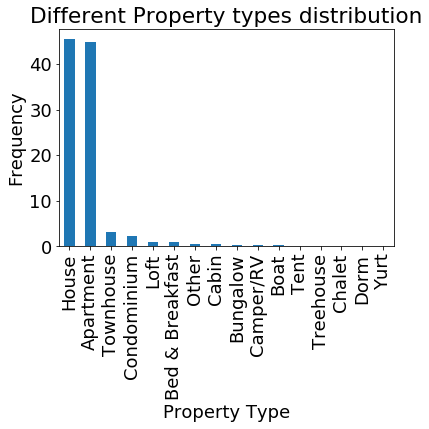

In [13]:
property_types_df.plot.bar()
plt.ylabel('Frequency')
plt.xlabel('Property Type')
plt.title('Different Property types distribution')

In [14]:
#get list of all property types
property_types = df_listings['property_type'].unique()
property_types = [x for x in property_types if pd.notnull(x)]


## Analysis of different available room types

In [15]:
room_types = (df_listings['room_type'].value_counts()/df_listings.shape[0])*100
room_types

Entire home/apt    66.553169
Private room       30.382399
Shared room         3.064432
Name: room_type, dtype: float64

Text(0.5, 1.0, 'Different Room types distribution')

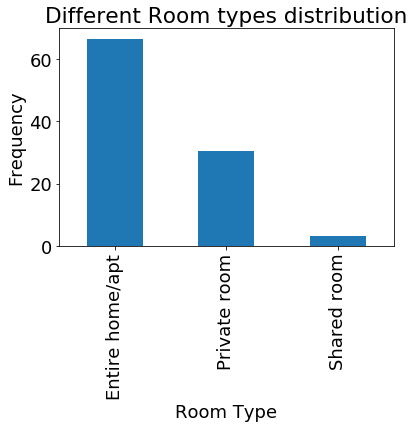

In [16]:
room_types.plot.bar()
plt.ylabel('Frequency')
plt.xlabel('Room Type')
plt.title('Different Room types distribution')

# Question 2 - Pricing Analysis

In [17]:
df_listing_copy = df_listings.copy()


In [18]:
# Cheking if there are any null values
df_listings['price'].isnull().sum()


0

In [19]:
# correcting prices formatand swapping them
locale.setlocale(locale.LC_ALL, 'en_US.UTF8')

df_listings = df_listings['price'].astype(str)

for i in range(len(df_listings)):
  df_listings[i] = locale.atof(df_listings[i].strip("$"))

df_listing_copy = df_listing_copy.drop('price', axis=1)
df_listing_copy['price'] = df_listings.astype(int)

In [20]:
prices_type = df_listing_copy.groupby('property_type')['price'].mean().sort_values(ascending=False)


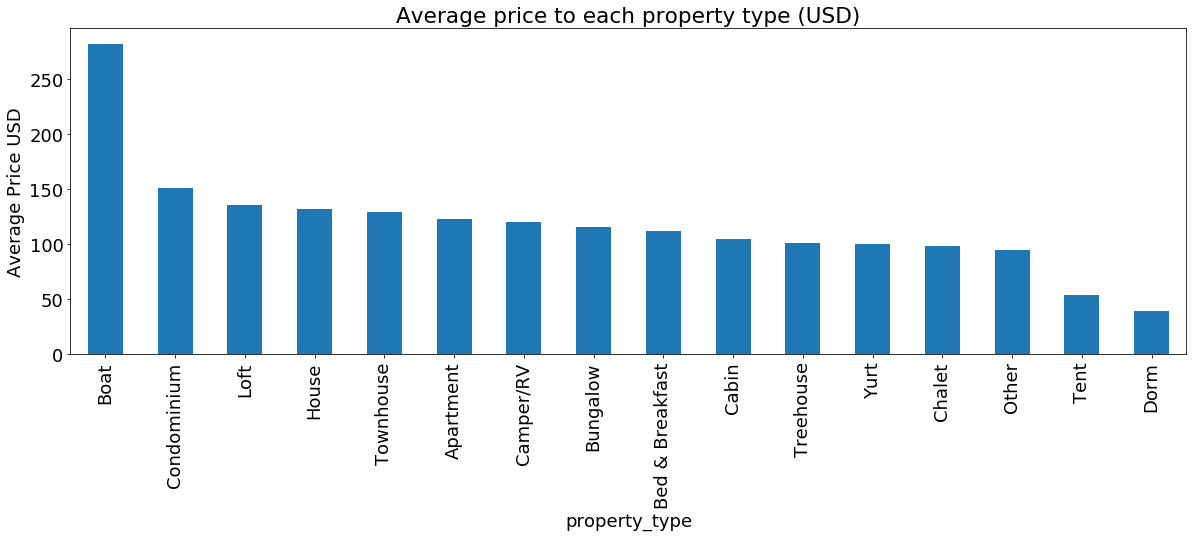

In [21]:
# Prices distribution
plt.figure(figsize=(20,6));
plt.title('Average price to each property type (USD)')
plt.xlabel('Property Type')
plt.ylabel('Average Price USD')
prices_type.plot.bar();

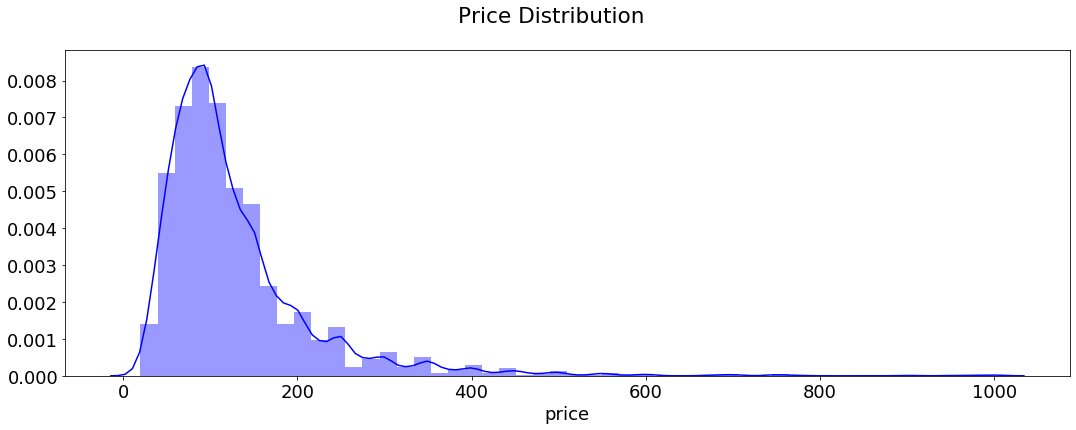

In [22]:
fig,axis = plt.subplots(1, figsize=(18,6))
plt.suptitle('Price Distribution')
plt.sca(axis)
sns.distplot(df_listing_copy['price'], color='blue', ax=axis)
plt.show()

 # Question 3: What we can understand from Guest reviews

In [23]:
scores = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
          'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']

In [24]:
# first we should check for the missing values
for val in scores:
    miising_vlues = df_listing_copy[val].isnull().mean()
    print(val, ' has ',np.round(100*miising_vlues,2),' % missing valiues')
        


review_scores_rating  has  16.95  % missing valiues
review_scores_accuracy  has  17.23  % missing valiues
review_scores_cleanliness  has  17.1  % missing valiues
review_scores_checkin  has  17.23  % missing valiues
review_scores_communication  has  17.05  % missing valiues
review_scores_location  has  17.16  % missing valiues
review_scores_value  has  17.18  % missing valiues


In [25]:
# regarding to all missing valus, we need to fill them up. 
#We do this job by replacing missing values with average of each type's score

for val in scores:
  df_listing_copy[val].fillna((df_listing_copy[val].mean()), inplace=True)

In [26]:
#  computing average rate for each category
avg_rating = []
for val in scores:
    avg_rating.append(df_listing_copy[val].mean(axis=0))

In [27]:
avg_rating

[94.53926206244176,
 9.636392405063283,
 9.556398104265357,
 9.78670886075955,
 9.809598989580111,
 9.608915586468513,
 9.45224541429463]

No handles with labels found to put in legend.


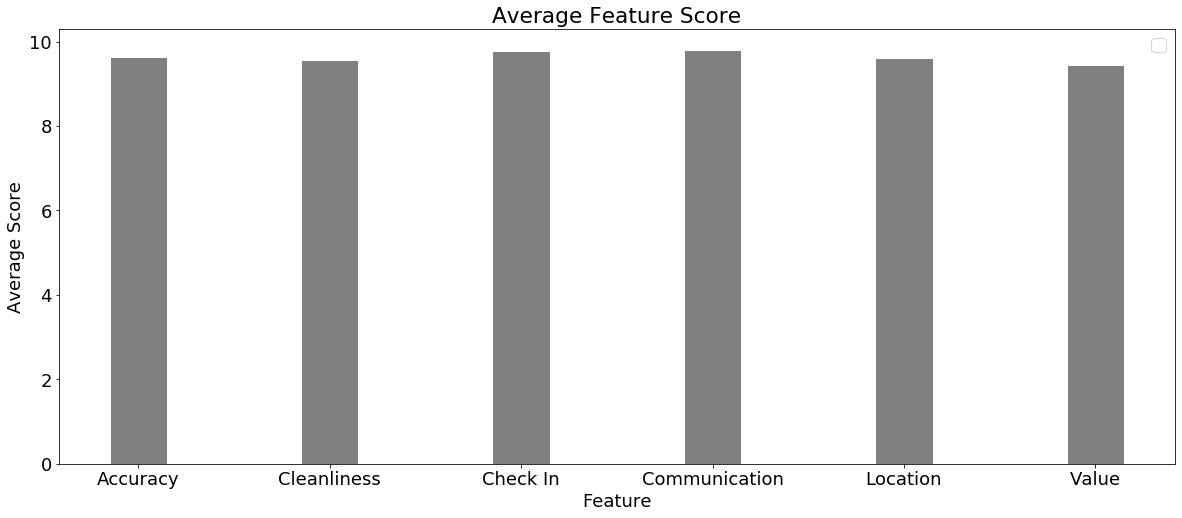

In [28]:
r1_sr = np.arange(len(avg_rating[1:7]))
r2_sr = [x  for x in r1_sr]

plt.figure(figsize=(20,8))
plt.title('Average Feature Score')
plt.bar(r1_sr, avg_rating[1:7], width=0.3, color='gray', edgecolor='white')
plt.xlabel('Feature')
plt.ylabel('Average Score')
plt.xticks([r  for r in range(len(avg_rating[1:7]))],['Accuracy', 'Cleanliness','Check In','Communication','Location','Value'])

plt.legend()
plt.show()

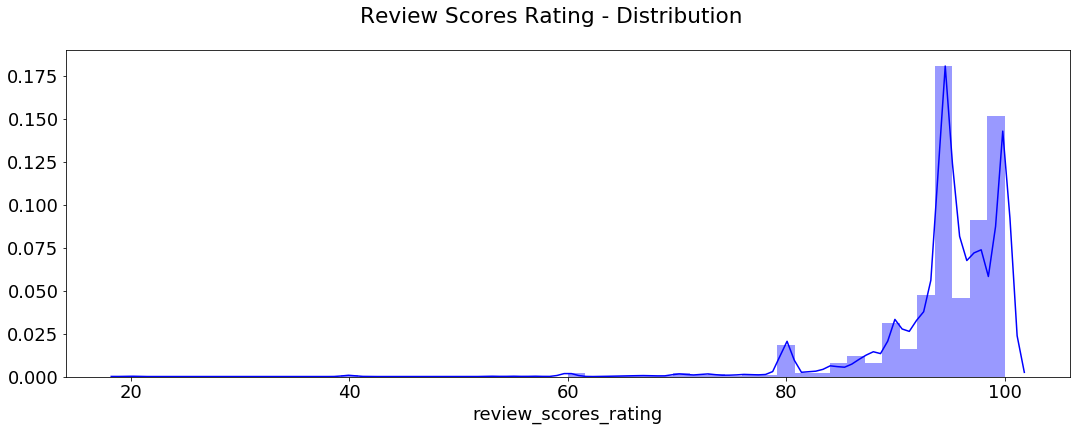

In [29]:
# observing rating score 's histogram'
fig,axis = plt.subplots(1, figsize=(18,6))
plt.suptitle('Review Scores Rating - Distribution')
plt.sca(axis)
sns.distplot(df_listing_copy['review_scores_rating'], color='blue', ax=axis)
plt.show()

In [30]:
avg_rating_propery_type = df_listing_copy.groupby('property_type')['review_scores_rating'].mean()



In [31]:
# Categories of ratings

rating_cats = ['Accuracy', 'Cleanliness','Check In','Communication','Location','Value']

No handles with labels found to put in legend.


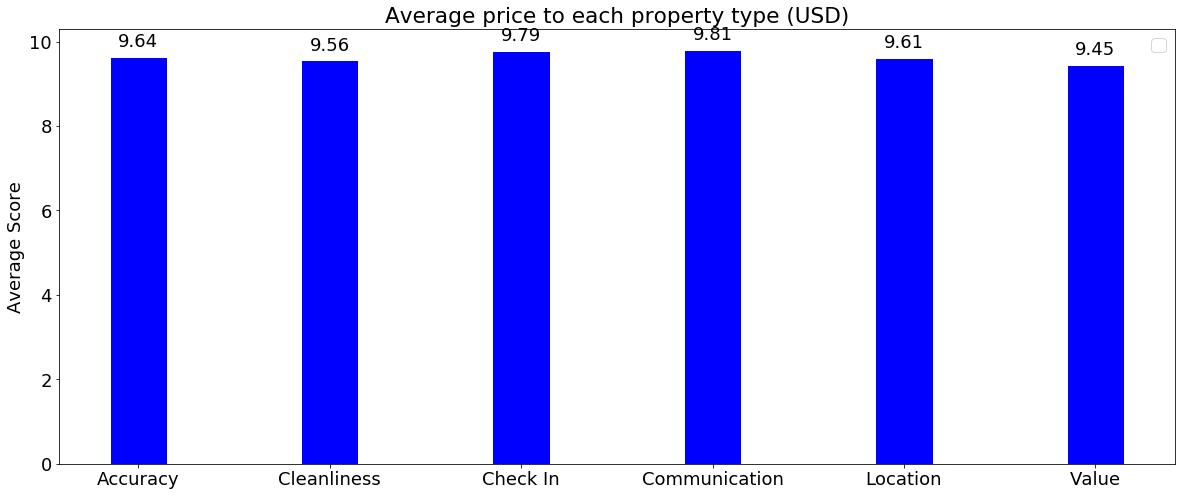

In [32]:
common_rating_property_type = []


for val in property_types:
    common_rating_property_type.append(avg_rating_propery_type[val])

r1_sr = np.arange(len(avg_rating[1:7]))
r2_sr = [x  for x in r1_sr]

plt.figure(figsize=(20,8))
plt.title('Average price to each property type (USD)')
plt.bar(r1_sr, avg_rating[1:7], width=0.3, color='blue', edgecolor='white')
# plt.xlabel(''Property Type')
plt.ylabel('Average Score')
plt.xticks([r  for r in range(len(avg_rating[1:7]))],['Accuracy', 'Cleanliness','Check In','Communication','Location','Value'])


for x,y in zip(r1_sr, avg_rating[1:7]):

    label = "{:.2f}".format(y)

    plt.annotate(label, 
                 (x,y), 
                 textcoords="offset points",
                 xytext=(0,10), 
                 ha='center') 

plt.legend()
plt.show()